This notebook follows the tutorial SEACell_ATAC_analysis.ipynb found in the github repo dpeerlab/SEACElls
Link to original notebook:
https://github.com/dpeerlab/SEACells/blob/main/notebooks/SEACell_ATAC_analysis.ipynb

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
import SEACells

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100

This notebook requires three data files

Link to new_rna.h5ad:
https://drive.google.com/file/d/1dQKAoJxU-sipguIM60uw9kSbWM9PqS6N/view?usp=sharing

Link to new_atac.h5ad:
https://drive.google.com/file/d/17yv7E57gpELHyIMFD2bRvIx_ettP1BV1/view?usp=sharing

Link to hg38.gtf:
https://drive.google.com/file/d/1KCDF24UW3fWxXqDbrOJl_w8z3ZaUhD1j/view?usp=sharing

In [5]:
rna_ad = sc.read('new_rna.h5ad')
atac_ad = sc.read('new_atac.h5ad')

In [6]:
rna_ad

AnnData object with n_obs × n_vars = 11926 × 4070
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_0.1', 'leiden_0.15', 'leiden_0.2', 'leiden_0.3', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'dendrogram_celltype', 'dendrogram_leiden_0.2', 'hvg', 'leiden', 'leiden_0.15_colors', 'leiden_0.1_colors', 'leiden_0.2_colors', 'leiden_0.3_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
atac_ad

AnnData object with n_obs × n_vars = 11926 × 242409
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio', 'Clusters', 'ReadsInPeaks', 'FRIP', 'leiden', 'SEACell', 'celltype'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'
    uns: 'GeneScoresColums', 'celltype_colors', 'leiden', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'GeneScores', 'X_svd', 'X_umap'
    obsp: 'connectivities', 'distances'

In [8]:
atac_ad.obs[['Sample']].head()

,Sample
index,
CAGAACCGTTCACTGT-1,BCL
ATTCATGAGATGCCTG-1,BCL
TTGACATCAGCGCTTG-1,BCL
CCTTGCGTCCTTCGTA-1,BCL
CCTGCTCCAGCAAGTG-1,BCL


In [9]:
#df['my_column'] = df['my_column'].str.replace('this_string', '')
#atac_ad.obs.index = atac_ad.obs.index.str.replace('BCL#', '')

In [10]:
atac_ad.obs[['SEACell']].head()

,SEACell
index,
CAGAACCGTTCACTGT-1,SEACell-92
ATTCATGAGATGCCTG-1,SEACell-37
TTGACATCAGCGCTTG-1,SEACell-126
CCTTGCGTCCTTCGTA-1,SEACell-14
CCTGCTCCAGCAAGTG-1,SEACell-139


In [11]:
rna_ad.obs[['n_genes']].head()

,n_genes
CAGAACCGTTCACTGT-1,5362
ATTCATGAGATGCCTG-1,4918
TTGACATCAGCGCTTG-1,4786
CCTTGCGTCCTTCGTA-1,2340
CCTGCTCCAGCAAGTG-1,5037


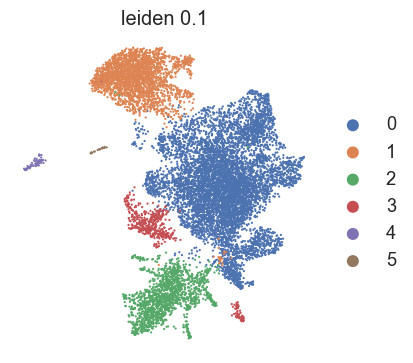

In [12]:
# Plot cell-types for reference (RNA)
sc.pl.scatter(rna_ad, basis='umap', color='leiden_0.1', frameon=False)

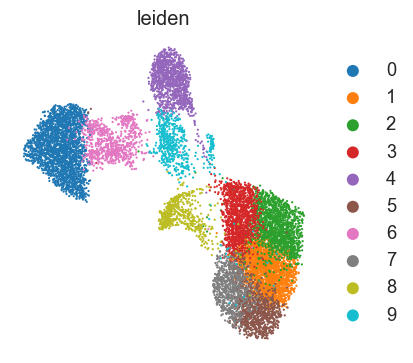

In [13]:
sc.pl.scatter(atac_ad, basis='umap', color='leiden', frameon=False)

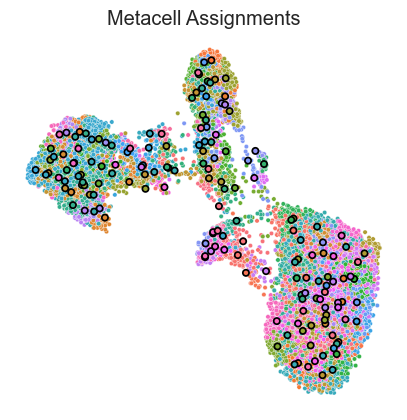

In [14]:
SEACells.plot.plot_2D(atac_ad, key='X_umap', colour_metacells=True)

In [15]:
atac_meta_ad, rna_meta_ad = SEACells.genescores.prepare_multiome_anndata(atac_ad, rna_ad, SEACells_label='SEACell')

Generating Metacell matrices...
 ATAC


100%|█████████████████████████████████████████| 170/170 [00:09<00:00, 17.49it/s]
/Users/shelbywengreen/opt/anaconda3/lib/python3.9/site-packages/SEACells/genescores.py:48: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  atac_meta_ad.obsm['X_svd'] = summ_svd.loc[atac_meta_ad.obs_names, :].values
/Users/shelbywengreen/opt/anaconda3/lib/python3.9/site-packages/SEACells/genescores.py:77: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  atac_ad.var['log_n_counts'] = np.ravel(np.log10(atac_ad.X.sum(axis=0)))


 RNA


/Users/shelbywengreen/opt/anaconda3/lib/python3.9/site-packages/SEACells/genescores.py:58: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  rna_mod_ad.obs['temp'] = atac_mod_ad.obs[SEACells_label]
100%|████████████████████████████████████████| 170/170 [00:00<00:00, 207.37it/s]
/Users/shelbywengreen/opt/anaconda3/lib/python3.9/site-packages/SEACells/genescores.py:69: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  meta_ad.raw = meta_ad.copy()
/Users/shelbywengreen/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))
/Users/shelbywengreen/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:3

In [16]:
atac_meta_ad

AnnData object with n_obs × n_vars = 170 × 242409
    obs: 'n_counts'
    var: 'GC_bin', 'counts_bin', 'n_cells'
    uns: 'log1p'
    obsm: 'X_svd'
    layers: 'raw'

In [17]:
rna_meta_ad

AnnData object with n_obs × n_vars = 170 × 4070
    obs: 'n_counts'
    uns: 'log1p'
    layers: 'raw'

In [18]:
# In this example, we compute gene peak correlations for the first ten genes since 
# this process is computationally intensive
gene_set = rna_meta_ad.var_names[:]
gene_peak_cors = SEACells.genescores.get_gene_peak_correlations(atac_meta_ad, rna_meta_ad, 
                                           path_to_gtf='hg38.gtf', 
                                           span=100000, 
                                           n_jobs=1,
                                           gene_set=gene_set)

Loading transcripts per gene...
Preparing matrices for gene-peak associations
Computing peak-gene correlations


  0%|▏                                        | 19/4070 [00:14<46:04,  1.47it/s]/Users/shelbywengreen/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1953: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
  7%|██▉                                     | 305/4070 [02:05<09:45,  6.43it/s]/Users/shelbywengreen/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1953: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
 11%|████▎                                   | 436/4070 [02:43<08:58,  6.75it/s]/Users/shelbywengreen/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1953: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
 12%|████▊                                   | 493/4070 [03:01<16:16,  3.66it/s]/Users/shelbywengreen/opt/anaconda3/lib/p

In [19]:
gene_peak_cors

ISG15                                  cor      pval
chr1:...
SDF4                                   cor      pval
chr1:...
ACAP3                                  cor      pval
chr1:...
INTS11                                                      0
AURKAIP1                               cor      pval
chr1:...
                                  ...                        
MT-ND4L                                                     0
MT-ND4                                                      0
MT-ND5                                                      0
MT-ND6                                                      0
MT-CYB                                                      0
Length: 4070, dtype: object

In [20]:
gene_peak_cors.to_pickle('new_gene_peak_cors.p')

In [21]:
peak_counts = SEACells.genescores.get_gene_peak_assocations(gene_peak_cors, 
                                                           pval_cutoff=1e-1,
                                                           cor_cutoff=0.1)

100%|█████████████████████████████████████| 4070/4070 [00:01<00:00, 3444.94it/s]


Text(0, 0.5, 'No. of correlated peaks')

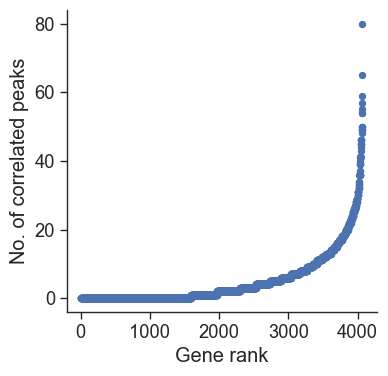

In [22]:
# Plot the distribution to identify genes with higher degree of regulation
plt.scatter(np.arange(len(peak_counts)), 
           np.sort(peak_counts), s=20)
sns.despine()
plt.xlabel('Gene rank')
plt.ylabel('No. of correlated peaks')

In [23]:
gene_scores = SEACells.genescores.get_gene_scores(atac_meta_ad, 
                                                  gene_peak_cors,
                                                  pval_cutoff=1e-1,
                                                  cor_cutoff=0.1)

100%|███████████████████████████████████████| 4070/4070 [04:59<00:00, 13.60it/s]


In [44]:
# Select genes based on the elbow point
high_reg_genes = peak_counts.index[peak_counts > 9]

In [25]:
# We will reuse the atac_meta_ad computed above

# Add SVD summary to atac meta ad
seacell_label = 'SEACell'
sc_svd = pd.DataFrame(atac_ad.obsm['X_svd'], index=atac_ad.obs_names)
atac_meta_ad.obsm['X_svd'] = sc_svd.groupby(atac_ad.obs[seacell_label]).mean().loc[atac_meta_ad.obs_names, :]

In [26]:
# Determine open peaks in each metacell
SEACells.accessibility.determine_metacell_open_peaks(atac_meta_ad, peak_set=None, low_dim_embedding='X_svd', pval_cutoff=1e-2,
                                  read_len=147, n_neighbors=3, n_jobs=1)
# This function will add 'OpenPeaks' to the Anndata layers and is a binary matrix 
# indicating whether the peak is open or closed in the metacell

100%|█████████████████████████████████████████| 170/170 [00:15<00:00, 10.64it/s]


In [27]:
# Compute gene accessibility
SEACells.accessibility.get_gene_accessibility(atac_meta_ad, gene_peak_cors, 
                                              gene_set=high_reg_genes, pval_cutoff=1e-1, cor_cutoff=0.1)
# p-value and corrrelation cutoffs are used for correlated peaks
# This function will add 'GeneAccessibility' to the Anndata `.obsm` field

100%|████████████████████████████████████████| 721/721 [00:00<00:00, 877.65it/s]


In [28]:
atac_meta_ad.obsm['GeneAccessibility']

,ISG15,TPRG1L,E2F2,HMGCL,WASF2,MRPS15,RFX5,ILF2,CKS1B,FLAD1,...,GTSE1,CRELD2,TUBGCP6,HDAC10,DENND6B,LINC01285,IDH3G,HCFC1,TKTL1,FAM50A
SEACell-92,0.846154,0.909091,0.909091,0.7500,0.923077,0.923077,0.8,0.909091,1.000000,0.95,...,1.0,0.909091,0.916667,0.909091,0.892857,0.818182,0.785714,1.0000,0.909091,1.000000
SEACell-37,0.961538,0.909091,0.909091,0.9375,0.846154,1.000000,0.9,1.000000,0.925926,1.00,...,1.0,0.636364,0.958333,0.954545,0.964286,0.727273,0.928571,1.0000,1.000000,1.000000
SEACell-126,0.961538,0.818182,0.636364,1.0000,0.846154,0.846154,1.0,1.000000,1.000000,0.80,...,0.7,0.818182,0.916667,0.909091,0.928571,0.909091,0.785714,0.8750,1.000000,0.928571
SEACell-14,0.961538,0.909091,0.909091,0.9375,1.000000,0.846154,1.0,0.636364,0.962963,0.95,...,0.7,0.909091,0.958333,1.000000,1.000000,0.727273,1.000000,0.9375,1.000000,1.000000
SEACell-139,0.923077,1.000000,0.636364,0.8125,0.846154,0.846154,0.8,0.727273,0.888889,0.95,...,0.5,0.727273,0.916667,0.954545,0.964286,0.818182,0.928571,0.9375,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEACell-59,0.615385,0.454545,0.636364,0.5625,0.538462,0.461538,0.7,0.636364,0.666667,0.80,...,0.7,0.272727,0.625000,0.500000,0.464286,0.363636,0.642857,0.7500,0.545455,0.642857
SEACell-129,0.807692,0.727273,0.727273,0.5000,0.538462,0.769231,0.6,0.818182,0.740741,0.90,...,0.6,0.545455,0.500000,0.409091,0.535714,0.363636,0.714286,0.9375,0.636364,0.714286
SEACell-159,0.653846,0.818182,0.545455,0.8750,0.615385,0.692308,0.6,0.545455,0.740741,0.65,...,0.7,0.181818,0.750000,0.500000,0.571429,0.545455,0.500000,0.8750,0.545455,0.642857
SEACell-20,0.653846,0.272727,0.454545,0.6250,0.846154,0.307692,0.6,0.545455,0.740741,0.70,...,0.1,0.545455,0.583333,0.545455,0.464286,0.545455,0.642857,0.7500,0.454545,0.428571


In [29]:
# First generate a summarized umap to visualize gene accessilibility
# We will use the RNA meta data to compare expression and accessibility 
rna_umap = pd.DataFrame(rna_ad.obsm['X_umap'], index=rna_ad.obs_names)
rna_meta_ad.obsm['X_umap'] = rna_umap.groupby(atac_ad.obs[seacell_label]).mean().loc[rna_meta_ad.obs_names, :].values

In [67]:
potential_genes = rna_meta_ad.var_names[:].intersection(high_reg_genes)

In [74]:
atac_meta_ad.obs['celltype'] = atac_ad.obs.groupby('SEACell').apply(lambda x: pd.Series(x['celltype']).mode())

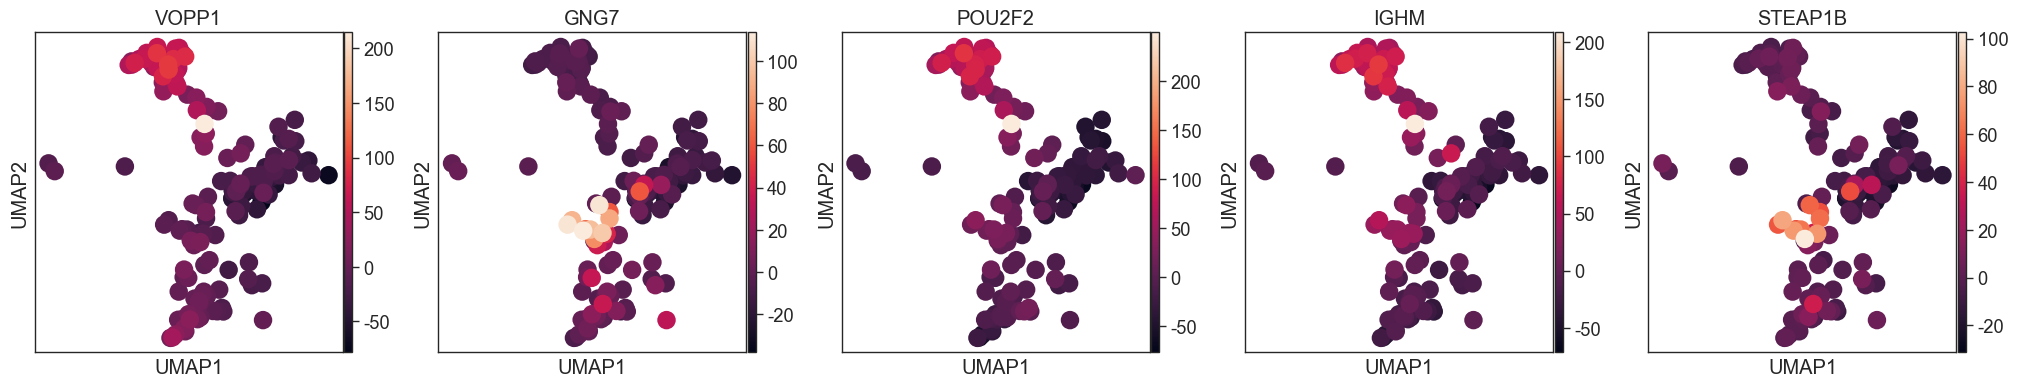

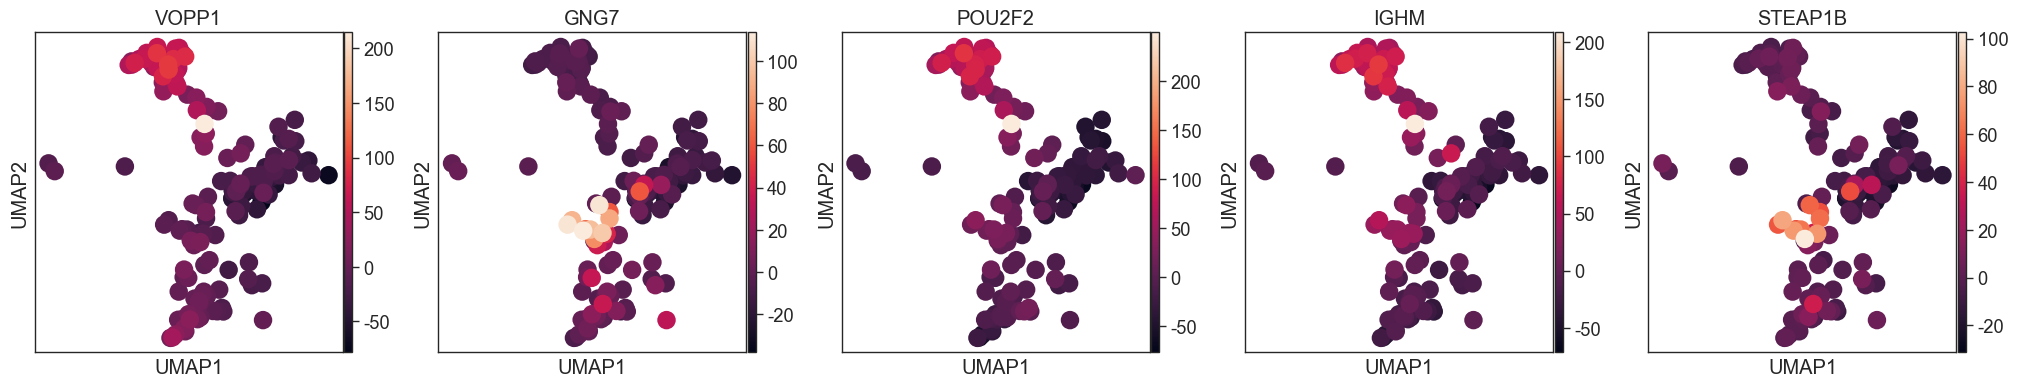

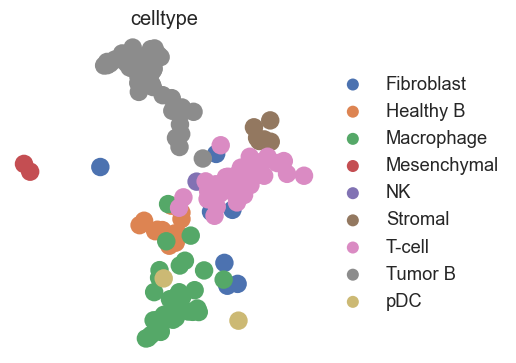

In [140]:
genes = ['VOPP1', 'GNG7', 'POU2F2','IGHM','STEAP1B']
# Copy accessibility to RNA meta anndata
temp = rna_meta_ad[:, genes]
temp.layers['GeneAccessibility'] = atac_meta_ad[rna_meta_ad.obs_names].obsm['GeneAccessibility'][genes].values
temp.obs['celltype'] = atac_ad.obs.groupby('SEACell').apply(lambda x: pd.Series(x['celltype']).mode())

# Plot expression
sc.pl.scatter(rna_meta_ad, basis='umap', color=genes)

# Plot accessibility
sc.pl.scatter(temp, basis='umap', color=genes, layers='GeneAccessibility')

# Plot cell types
sc.pl.scatter(temp, basis='umap', color='celltype', frameon=False)